# Premier League 23/24 Analysis

### Exploratory Data Analysis & Cleaning

##### Changes implemented:
- Drop the following columns: Season, Comp, Notes, Match Report
- Changed team names to proper English
- Join df to itself to see each match as one record in the table, dropping and renaming columns where necessary. Reordered columns for readability.

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  matplotlib.colors import LinearSegmentedColormap

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv(r'Data\matches.csv', index_col = 0)

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 760 entries, 1 to 40
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          760 non-null    object 
 1   Time          760 non-null    object 
 2   Comp          760 non-null    object 
 3   Round         760 non-null    object 
 4   Day           760 non-null    object 
 5   Venue         760 non-null    object 
 6   Result        760 non-null    object 
 7   GF            760 non-null    int64  
 8   GA            760 non-null    int64  
 9   Opponent      760 non-null    object 
 10  xG            760 non-null    float64
 11  xGA           760 non-null    float64
 12  Poss          760 non-null    float64
 13  Attendance    760 non-null    float64
 14  Captain       760 non-null    object 
 15  Formation     760 non-null    object 
 16  Referee       760 non-null    object 
 17  Match Report  760 non-null    object 
 18  Notes         0 non-null      float6

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
1,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3,0,Burnley,1.9,0.3,65.0,21572.0,Kevin De Bruyne,4-2-3-1,Craig Pawson,Match Report,NaN,17.0,8.0,13.9,0.0,0,0,2024,ManchesterCity
3,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1,0,Newcastle Utd,1.0,0.3,59.0,53419.0,Kyle Walker,4-2-3-1,Robert Jones,Match Report,NaN,14.0,4.0,17.9,0.0,0,0,2024,ManchesterCity
4,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2,1,Sheffield Utd,3.5,0.7,79.0,31336.0,Kyle Walker,4-2-3-1,Jarred Gillett,Match Report,NaN,29.0,9.0,17.3,2.0,0,1,2024,ManchesterCity
5,2023-09-02,15:00,Premier League,Matchweek 4,Sat,Home,W,5,1,Fulham,2.2,1.4,68.0,52899.0,Kyle Walker,4-2-3-1,Michael Oliver,Match Report,NaN,6.0,4.0,14.8,0.0,1,1,2024,ManchesterCity
6,2023-09-16,15:00,Premier League,Matchweek 5,Sat,Away,W,3,1,West Ham,3.6,0.9,68.0,62475.0,Kyle Walker,4-2-3-1,Andy Madley,Match Report,NaN,29.0,13.0,16.4,1.0,0,0,2024,ManchesterCity


In [3]:
# drop unhelpful columns
cols_to_drop = ['Season', 'Comp', 'Notes', 'Match Report']
df = df.drop(columns = cols_to_drop)

In [4]:
# rename teams
df['Team'] = df['Team'].replace({'ManchesterCity': 'Manchester City',
                                'AstonVilla': 'Aston Villa',
                                'TottenhamHotspur': 'Tottenham Hotspur',
                                'NewcastleUnited': 'Newcastle United',
                                'ManchesterUnited': 'Manchester United',
                                'WestHamUnited': 'West Ham United',
                                'LutonTown': 'Luton Town',
                                'NottinghamForest': 'Nottingham Forest',
                                'WolverhamptonWanderers' : 'Wolverhampton Wanderers',
                                'BrightonandHoveAlbion': 'Brighton',
                                'CrystalPalace': 'Crystal Palace',
                                'SheffieldUnited': 'Sheffield United'})

In [5]:
# split table by home and away, then join on date, time and referee
# logic here is that multiple games occur at same date, and even same time, but impossible for referee to be in two places at once
prem_df_home = df[df['Venue'] == 'Home'].sort_values(['Date', 'Time', 'Referee'])
prem_df_away = df[df['Venue'] == 'Away'].sort_values(['Date', 'Time', 'Referee'])
prem_df = prem_df_home.merge(prem_df_away, on = ['Date', 'Time', 'Referee'], suffixes = ['', '_Away'])

In [6]:
# columns to drop from new self-joined table
cols_to_drop = ['Venue', 'GA', 'Opponent', 'xGA', 'Round_Away', 'Day_Away', 'Venue_Away', 'GA_Away', 'Opponent_Away', 'xGA_Away', 'Attendance_Away']

# drop unnecessary colums
prem_df = prem_df.drop(cols_to_drop, axis = 1)

In [7]:
# columns to rename
rename_cols_map = {
    'Result': 'Home Result',
    'GF': 'Home GF',
    'xG': 'Home xG',
    'Poss': 'Home Poss',
    'Captain': 'Home Captain',
    'Formation': 'Home Formation',
    'Sh': 'Home Sh',
    'SoT': 'Home SoT',
    'Dist': 'Home Dist',
    'FK': 'Home FK',
    'PK': 'Home Pen',
    'PKatt': 'Home PKatt',
    'Team': 'Home Team',
    'Result_Away': 'Away Result',
    'GF_Away': 'Away GF',
    'xG_Away': 'Away xG',
    'Poss_Away': 'Away Poss',
    'Captain_Away': 'Away Captain',
    'Formation_Away': 'Away Formation',
    'Sh_Away': 'Away Sh',
    'SoT_Away': 'Away SoT',
    'Dist_Away': 'Away Dist',
    'FK_Away': 'Away FK',
    'PK_Away': 'Away Pen',
    'PKatt_Away': 'Away PKatt',
    'Team_Away': 'Away Team',
}

# rename columns
prem_df = prem_df.rename(mapper = rename_cols_map, axis = 1)

In [8]:
# reshuffle column order to increase readability
prem_df = prem_df[['Date', 'Time', 'Round', 'Day', 'Referee', 'Home Team', 'Home Result', 'Home GF', 'Home xG', 'Home Poss', 'Home Sh', 'Home SoT',\
                  'Home Dist', 'Home FK', 'Home Pen', 'Home Captain', 'Away Team', 'Away Result', 'Away GF', 'Away xG', 'Away Poss', 'Away Sh',\
                  'Away SoT', 'Away Dist', 'Away FK', 'Away Pen', 'Away Captain']]



In [9]:
# sanity check - 10 games per weekend, for 38 weeks = 380 rows
assert len(prem_df == 380)

# look at first record
print(prem_df.iloc[0])

Date                 2023-08-11
Time                      20:00
Round               Matchweek 1
Day                         Fri
Referee            Craig Pawson
Home Team               Burnley
Home Result                   L
Home GF                       0
Home xG                     0.3
Home Poss                  35.0
Home Sh                     6.0
Home SoT                    1.0
Home Dist                  14.9
Home FK                     0.0
Home Pen                      0
Home Captain        Josh Cullen
Away Team       Manchester City
Away Result                   W
Away GF                       3
Away xG                     1.9
Away Poss                  65.0
Away Sh                    17.0
Away SoT                    8.0
Away Dist                  13.9
Away FK                     0.0
Away Pen                      0
Away Captain    Kevin De Bruyne
Name: 0, dtype: object


### Analysis - Referees
With a lot of scrutiny placed upon the standard of refereeing in English football in recent years, and especially the last few weeks (David Coote), let's have a look at what impact, if any, choice of referee has on Premier League games.

#### Does referee choice impact the number of goals scored?

In [10]:
# copy df
prem_ref_df = prem_df.copy()

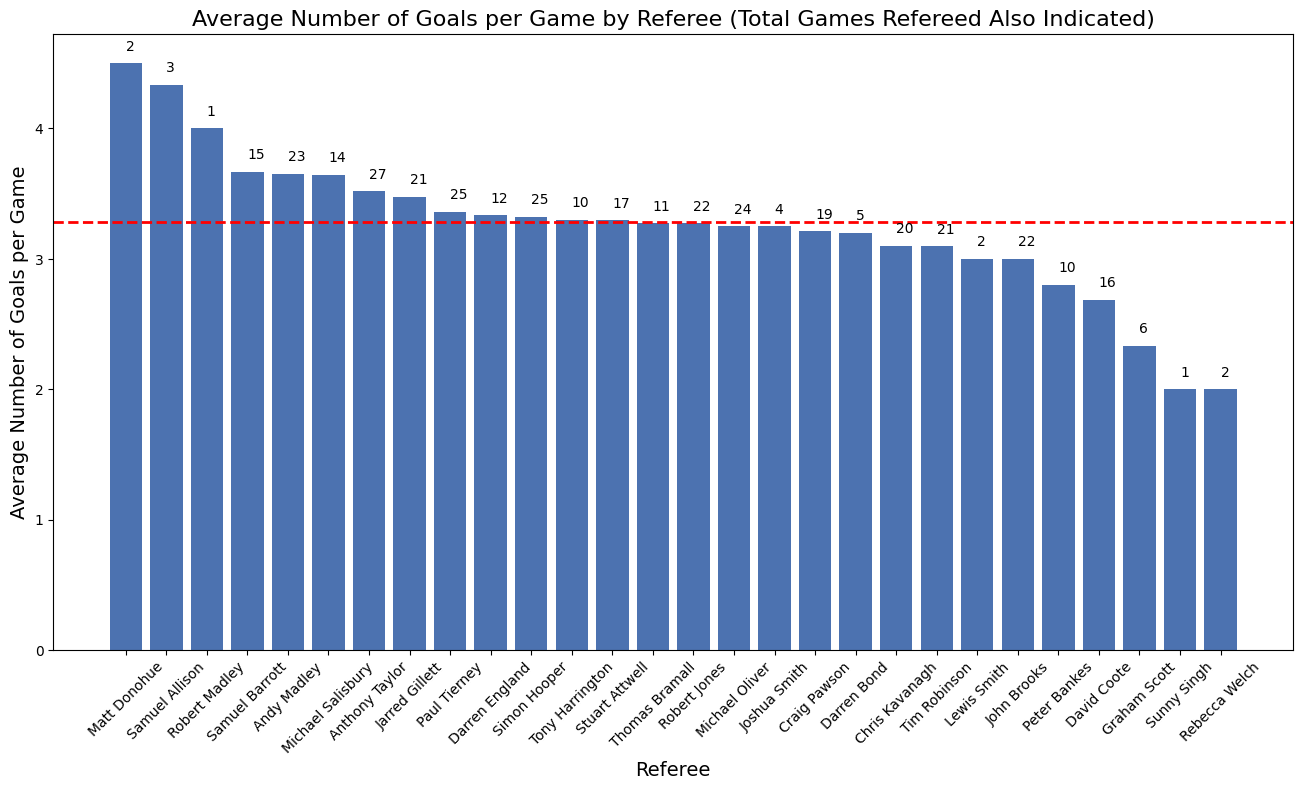

In [11]:
# total goals column
prem_ref_df['Total Goals'] = prem_ref_df['Home GF'] + prem_ref_df['Away GF']

# avg_goals per match (used as line in chart below)
avg_goals_per_match = prem_ref_df['Total Goals'].mean()

# calculate avg goals per game by ref, and total games
avg_goals_by_ref = prem_ref_df.groupby('Referee').agg(mean_goals = ('Total Goals', 'mean'),
                                                      total_games = ('Date', 'count')).sort_values(by = 'mean_goals', ascending = False)    

# matplotlib
plt.style.use('seaborn-v0_8-deep')
fig, ax = plt.subplots()
fig.set_size_inches([16, 8])
plt.bar(avg_goals_by_ref.index, avg_goals_by_ref['mean_goals'])
plt.title('Average Number of Goals per Game by Referee (Total Games Refereed Also Indicated)', fontsize = 16)
plt.xlabel('Referee', fontsize = 14)
plt.ylabel('Average Number of Goals per Game', fontsize = 14)
plt.xticks(rotation = 45)

# avg goals line
plt.axhline(y = avg_goals_per_match, color = 'r', linestyle = '--', linewidth = 2)

# total games referreed label
def add_labels(variables, values):
    for i in range(len(variables)):
        plt.text(i, ax.patches[i].get_height() + 0.1, avg_goals_by_ref['total_games'].iloc[i])

add_labels(avg_goals_by_ref.index, avg_goals_by_ref['total_games'])

As we can see, most data points fit very closely to the average, indicating referee selection doesn't impact number of goals greatly, or most referees follow a standard of refereeing closely. We can see variables that could be considered outliers, such as Matt Donohue or Rebecca Welch, be explained by the fact these referees were in charge of much fewer games than average.

#### Does referee choice impact the number of freekicks or penalties?

In [12]:
# ...

### Analysis - Which factors have the greatest impact on results and final ranking?
I would like to examine how metrics like number of shots, GF, GA, and xG impact results and points.

In [13]:
# import premier league final table 23/24
prem_table_df = pd.read_csv(r'Data\premier league standings 23-24.csv', index_col = 0)
print(prem_table_df.head())

                   Team   W   D   L  GF  GA  GD  Points
Rank                                                   
1       Manchester City  28   7   3  96  34  62      91
2               Arsenal  28   5   5  91  29  62      89
3             Liverpool  24  10   4  86  41  45      82
4           Aston Villa  20   8  10  76  61  15      68
5     Tottenham Hotspur  20   6  12  74  61  13      66


In [14]:
# copy df
prem_table_stats = prem_table_df.copy()

# create new columns
prem_table_stats['Home Shots'] = 0
prem_table_stats['Home Shots On Target'] = 0
prem_table_stats['Home Avg Distance'] = 0.0
prem_table_stats['Home Avg Possession'] = 0.0
prem_table_stats['Home xG'] = 0.0
prem_table_stats['Home GF'] = 0
prem_table_stats['Home GA'] = 0
prem_table_stats['Away Shots'] = 0
prem_table_stats['Away Shots'] = 0
prem_table_stats['Away Shots On Target'] = 0
prem_table_stats['Away Avg Distance'] = 0.0
prem_table_stats['Away Avg Possession'] = 0.0
prem_table_stats['Away xG'] = 0.0
prem_table_stats['Away GF'] = 0
prem_table_stats['Away GA'] = 0


# list of teams
teams = prem_table_stats['Team']

# iterate over match day results df, and parse stats into league table df
for team in teams:
    for idk,row in prem_df.iterrows():
        if row['Home Team'] == team:
            prem_table_stats.loc[prem_table_stats['Team'] == team, 'Home Shots'] += row['Home Sh']
            prem_table_stats.loc[prem_table_stats['Team'] == team, 'Home Shots On Target'] += row['Home SoT']
            prem_table_stats.loc[prem_table_stats['Team'] == team, 'Home Avg Distance'] += row['Home Dist'] 
            prem_table_stats.loc[prem_table_stats['Team'] == team, 'Home Avg Possession'] += row['Home Poss']
            prem_table_stats.loc[prem_table_stats['Team'] == team, 'Home xG'] += row['Home xG']
            prem_table_stats.loc[prem_table_stats['Team'] == team, 'Home GF'] += row['Home GF']
            prem_table_stats.loc[prem_table_stats['Team'] == team, 'Home GA'] += row['Away GF']
        elif row['Away Team'] == team:
            prem_table_stats.loc[prem_table_stats['Team'] == team, 'Away Shots'] += row['Away Sh']
            prem_table_stats.loc[prem_table_stats['Team'] == team, 'Away Shots On Target'] += row['Away SoT']
            prem_table_stats.loc[prem_table_stats['Team'] == team, 'Away Avg Distance'] += row['Away Dist'] 
            prem_table_stats.loc[prem_table_stats['Team'] == team, 'Away Avg Possession'] += row['Away Poss']
            prem_table_stats.loc[prem_table_stats['Team'] == team, 'Away xG'] += row['Away xG']
            prem_table_stats.loc[prem_table_stats['Team'] == team, 'Away GF'] += row['Away GF']
            prem_table_stats.loc[prem_table_stats['Team'] == team, 'Away GA'] += row['Home GF']
        else:
            pass

# update stats that are already averaged or proportions (distance is already average of team, and possession is a percentage)
prem_table_stats['Home Avg Distance'] = np.round(prem_table_stats['Home Avg Distance'] / 19, 2)
prem_table_stats['Home Avg Possession'] = np.round(prem_table_stats['Home Avg Possession'] / 19, 1)
prem_table_stats['Away Avg Distance'] = np.round(prem_table_stats['Away Avg Distance'] / 19, 2)
prem_table_stats['Away Avg Possession'] = np.round(prem_table_stats['Away Avg Possession'] / 19, 1)

# combined stats (home and away)
prem_table_stats['Combined Shots'] = prem_table_stats['Home Shots'] + prem_table_stats['Away Shots']
prem_table_stats['Combined Shots On Target'] = prem_table_stats['Home Shots On Target'] + prem_table_stats['Away Shots On Target']
prem_table_stats['Combined Avg Distance'] = np.round((prem_table_stats['Home Avg Distance'] + prem_table_stats['Away Avg Distance']) / 2, 2)
prem_table_stats['Combined Avg Possession'] = np.round((prem_table_stats['Home Avg Possession'] + prem_table_stats['Away Avg Possession']) / 2, 1)
prem_table_stats['Combined xG'] = prem_table_stats['Home xG'] + prem_table_stats['Away xG']

prem_table_stats.head()

,Team,W,D,L,GF,GA,GD,Points,Home Shots,Home Shots On Target,Home Avg Distance,Home Avg Possession,Home xG,Home GF,Home GA,Away Shots,Away Shots On Target,Away Avg Distance,Away Avg Possession,Away xG,Away GF,Away GA,Combined Shots,Combined Shots On Target,Combined Avg Distance,Combined Avg Possession,Combined xG
Rank,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Manchester City,28,7,3,96,34,62,91,363,123,16.58,66.9,40.6,51,16,320,141,16.72,63.5,40.0,45,18,683,264,16.65,65.2,80.6
2,Arsenal,28,5,5,91,29,62,89,356,118,15.89,58.7,43.6,48,16,291,91,15.82,57.6,32.7,43,13,647,209,15.86,58.2,76.3
3,Liverpool,24,10,4,86,41,45,82,471,165,17.53,62.6,54.8,49,17,310,98,17.12,59.9,33.0,37,24,781,263,17.33,61.2,87.8
4,Aston Villa,20,8,10,76,61,15,68,277,100,16.08,53.7,39.0,48,28,234,82,16.02,52.5,24.5,28,33,511,182,16.05,53.1,63.5
5,Tottenham Hotspur,20,6,12,74,61,13,66,323,114,16.25,61.4,39.2,38,27,259,93,17.06,61.8,28.8,36,34,582,207,16.66,61.6,68.0


<Axes: >

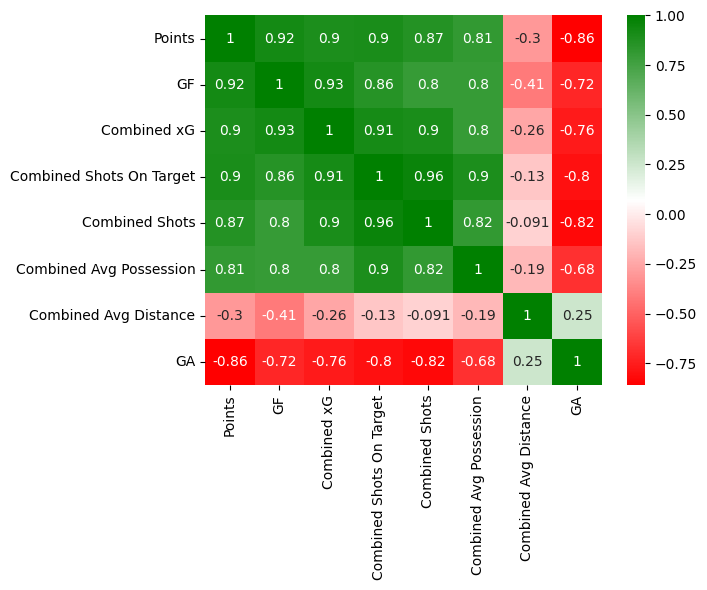

In [15]:
# correlation matrix of various variables
cols = ['Points', 'GF', 'Combined xG', 'Combined Shots On Target', 'Combined Shots', 'Combined Avg Possession', 'Combined Avg Distance', 'GA']
cmap = LinearSegmentedColormap.from_list('rg', ["r", "w", "g"], N = 256) 
sns.heatmap(prem_table_stats[cols].corr(), cmap = cmap, annot = True)

So unsurprisingly, there is a very strong correlation between points and goals, xG (or chances created), shots (on target or otherwise), and possession. Additionally, points has a strong negative correlation with goals conceded, as we obviously would expect.
However, I must admit I'm very surprised to see that points has a negative correlation with distance covered. I thought the greater distances covered by players, the more opportunities would arise to create chances, and the more opposition opportunities denied.

#### Goals Scored and Goals Conceded

"\nfor i, txt in enumerate(prem_table_stats['Team']):\n    ax.annotate(txt, (prem_table_stats.iloc[i]['GF'] - 2, prem_table_stats.iloc[i]['Points'] + 1))\n"

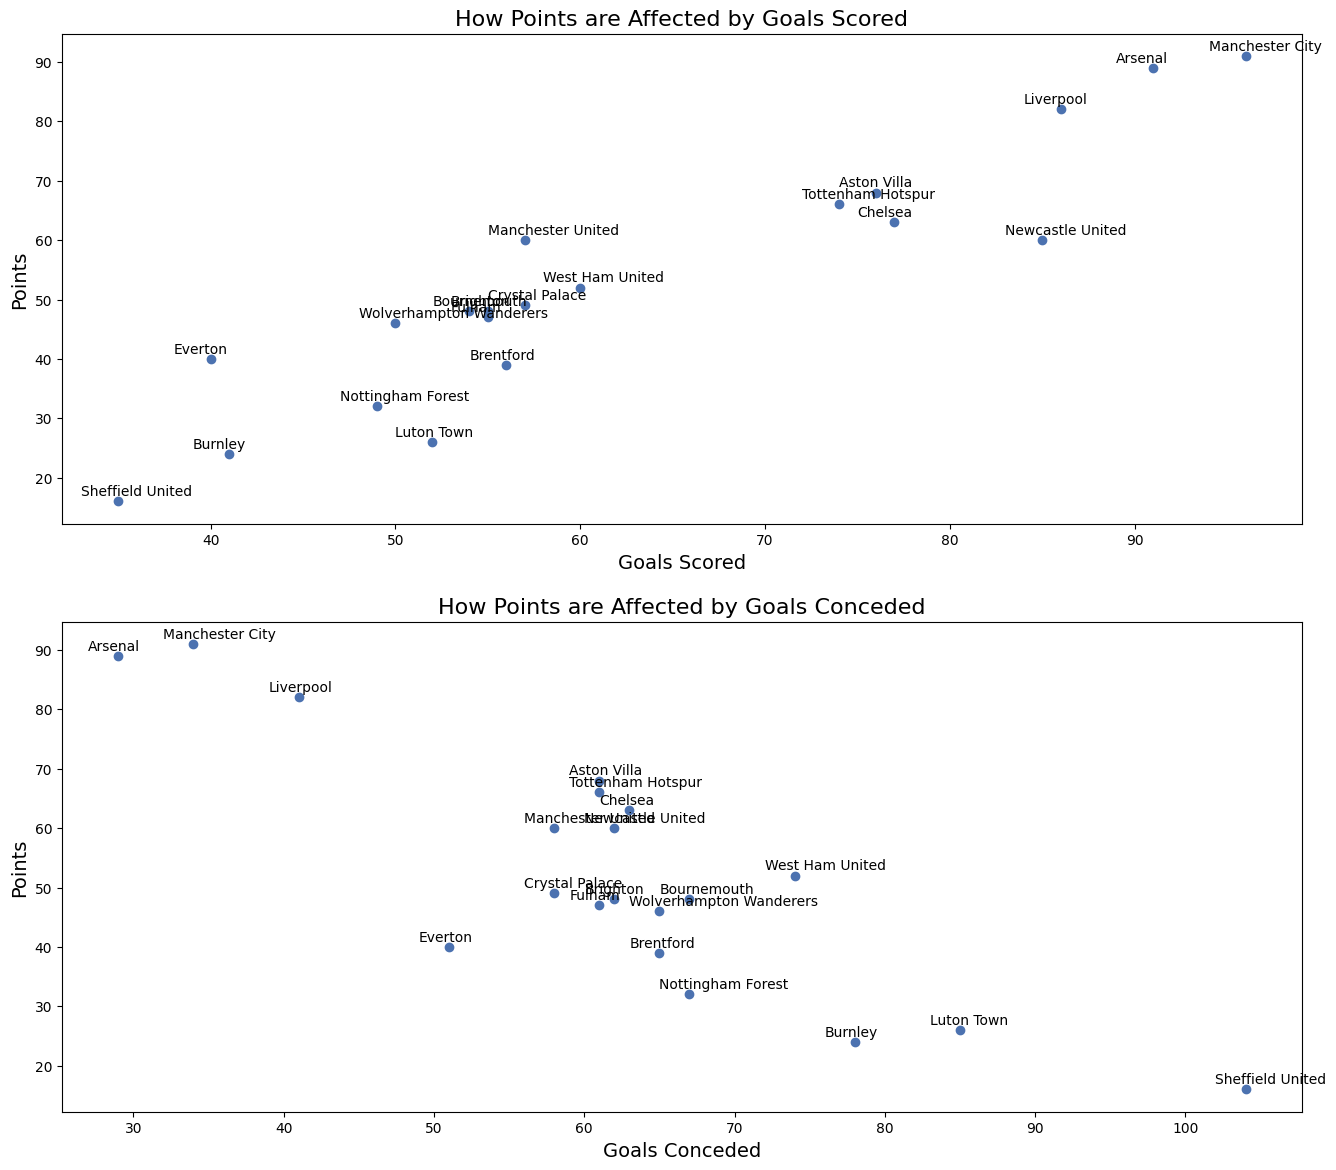

In [37]:
fig, ax = plt.subplots(2, 1)
fig.set_size_inches([16, 14])

# goals scored
ax[0].scatter(prem_table_stats['GF'], prem_table_stats['Points'])
ax[0].set_title('How Points are Affected by Goals Scored', fontsize = 16)
ax[0].set_xlabel('Goals Scored', fontsize = 14)
ax[0].set_ylabel('Points', fontsize = 14)

# goals conceded
ax[1].scatter(prem_table_stats['GA'], prem_table_stats['Points'])
ax[1].set_title('How Points are Affected by Goals Conceded', fontsize = 16)
ax[1].set_xlabel('Goals Conceded', fontsize = 14)
ax[1].set_ylabel('Points', fontsize = 14)

# annotate goals scored
for i, txt in enumerate(prem_table_stats['Team']):
    ax[0].annotate(txt, (prem_table_stats.iloc[i]['GF'] - 2, prem_table_stats.iloc[i]['Points'] + 1))

# annotate goals conceded
for i, txt in enumerate(prem_table_stats['Team']):
    ax[1].annotate(txt, (prem_table_stats.iloc[i]['GA'] - 2, prem_table_stats.iloc[i]['Points'] + 1))

What's most notable here are the points-to-goals-scored ratios of both Everton and Newcastle, for contrasting reasons.

It's clear to see Everton scored the second least goals in the 23/24 season, with only Sheffield scoring less. This can be attributed to Everton's ironclad defense in relation to their lacking firepower up top. We can see that Everton, although scoring very few goals, actually had the best defense in the league behind Arsenal, Man City and Liverpool. In other words, Everton have a top 4 quality defense!

Newcastle have the exact opposite problem - scoring goals is not a problem, but they have a relatively leaky defense. Despite considering outscoring Chelsea, Tottenham, and Aston Villa, their goals conceded is about the same, which ultimately denied Newcastle a top 4 finish. This suggests Newcastle had a few games they won very convincingly, but overall their form was inconsistent.

#### xG

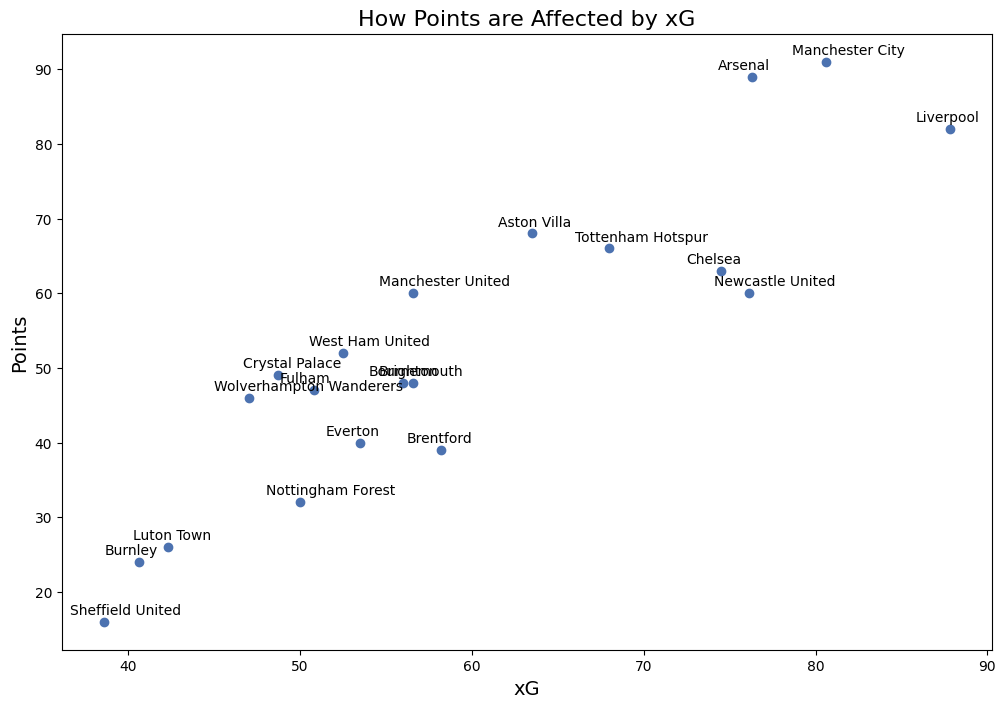

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches([12, 8])
plt.scatter(prem_table_stats['Combined xG'], prem_table_stats['Points'])
plt.title('How Points are Affected by xG', fontsize = 16)
plt.xlabel('xG', fontsize = 14)
plt.ylabel('Points', fontsize = 14)

for i, txt in enumerate(prem_table_stats['Team']):
    ax.annotate(txt, (prem_table_stats.iloc[i]['Combined xG'] - 2, prem_table_stats.iloc[i]['Points'] + 1))

#### Shots and Shots On Target

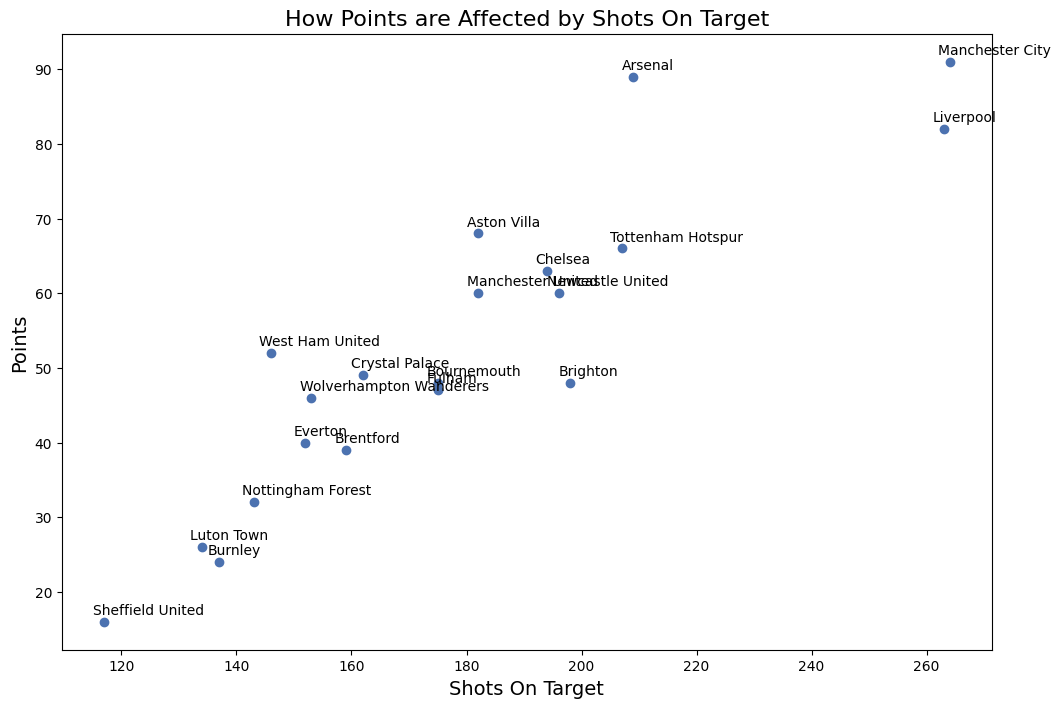

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches([12, 8])
plt.scatter(prem_table_stats['Combined Shots On Target'], prem_table_stats['Points'])
plt.title('How Points are Affected by Shots On Target', fontsize = 16)
plt.xlabel('Shots On Target', fontsize = 14)
plt.ylabel('Points', fontsize = 14)

for i, txt in enumerate(prem_table_stats['Team']):
    ax.annotate(txt, (prem_table_stats.iloc[i]['Combined Shots On Target'] - 2, prem_table_stats.iloc[i]['Points'] + 1))